In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [14]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt


from glob import glob
import IPython.display as ipd
from tqdm import tqdm

import subprocess

In [7]:
#Convert video type(.mov to .mp4)
input = '/kaggle/input/driving-video-with-object-tracking/bdd100k_videos_train_00/bdd100k/videos/train/0000f77c-6257be58.mov'
subprocess.run(['ffmpeg','-i',input,'-qscale','0','0000f77c-6257be58.mp4'])

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

CompletedProcess(args=['ffmpeg', '-i', '/kaggle/input/driving-video-with-object-tracking/bdd100k_videos_train_00/bdd100k/videos/train/0000f77c-6257be58.mov', '-qscale', '0', '0000f77c-6257be58.mp4'], returncode=1)

In [6]:
#Display video in notebook
ipd.Video('0000f77c-6257be58.mp4',height=500)

In [19]:
#Open video and read metadata
cap = cv2.VideoCapture('0000f77c-6257be58.mp4')


#Total no. of frames in video
print("Total no of frames in video are:",cap.get(cv2.CAP_PROP_FRAME_COUNT))

#Height of video

print("Height is:",cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Width of video
print("Width is:",cap.get(cv2.CAP_PROP_FRAME_WIDTH))

#Frames per second
print("FPS is",cap.get(cv2.CAP_PROP_FPS))


Total no of frames in video are: 1211.0
Height is: 720.0
Width is: 1280.0
FPS is 29.97002997002997


In [ ]:
#To ensure video are no longer used by python
cap.release()

In [25]:
#Pulling Images from video
cap = cv2.VideoCapture('0000f77c-6257be58.mp4')
ret,image = cap.read()
print(f'Returned {ret} and shape of image is {image.shape}' )

Returned True and shape of image is (720, 1280, 3)


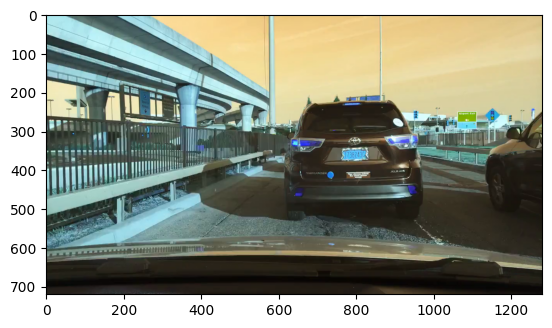

In [26]:
plt.imshow(image)

In [27]:
#Function for plotting opencv images in notebook
def display_cv2_img(img,figsize=(10,10)):
    img_ = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    fig,ax = plt.subplots()
    ax.imshow(img_)

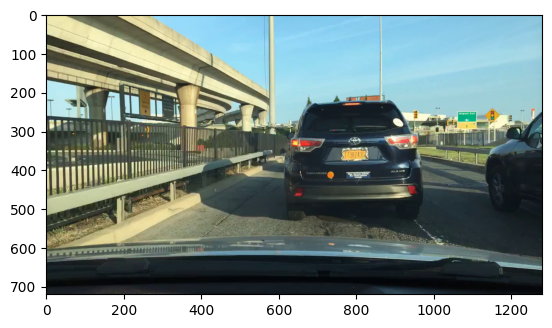

In [28]:
display_cv2_img(image)

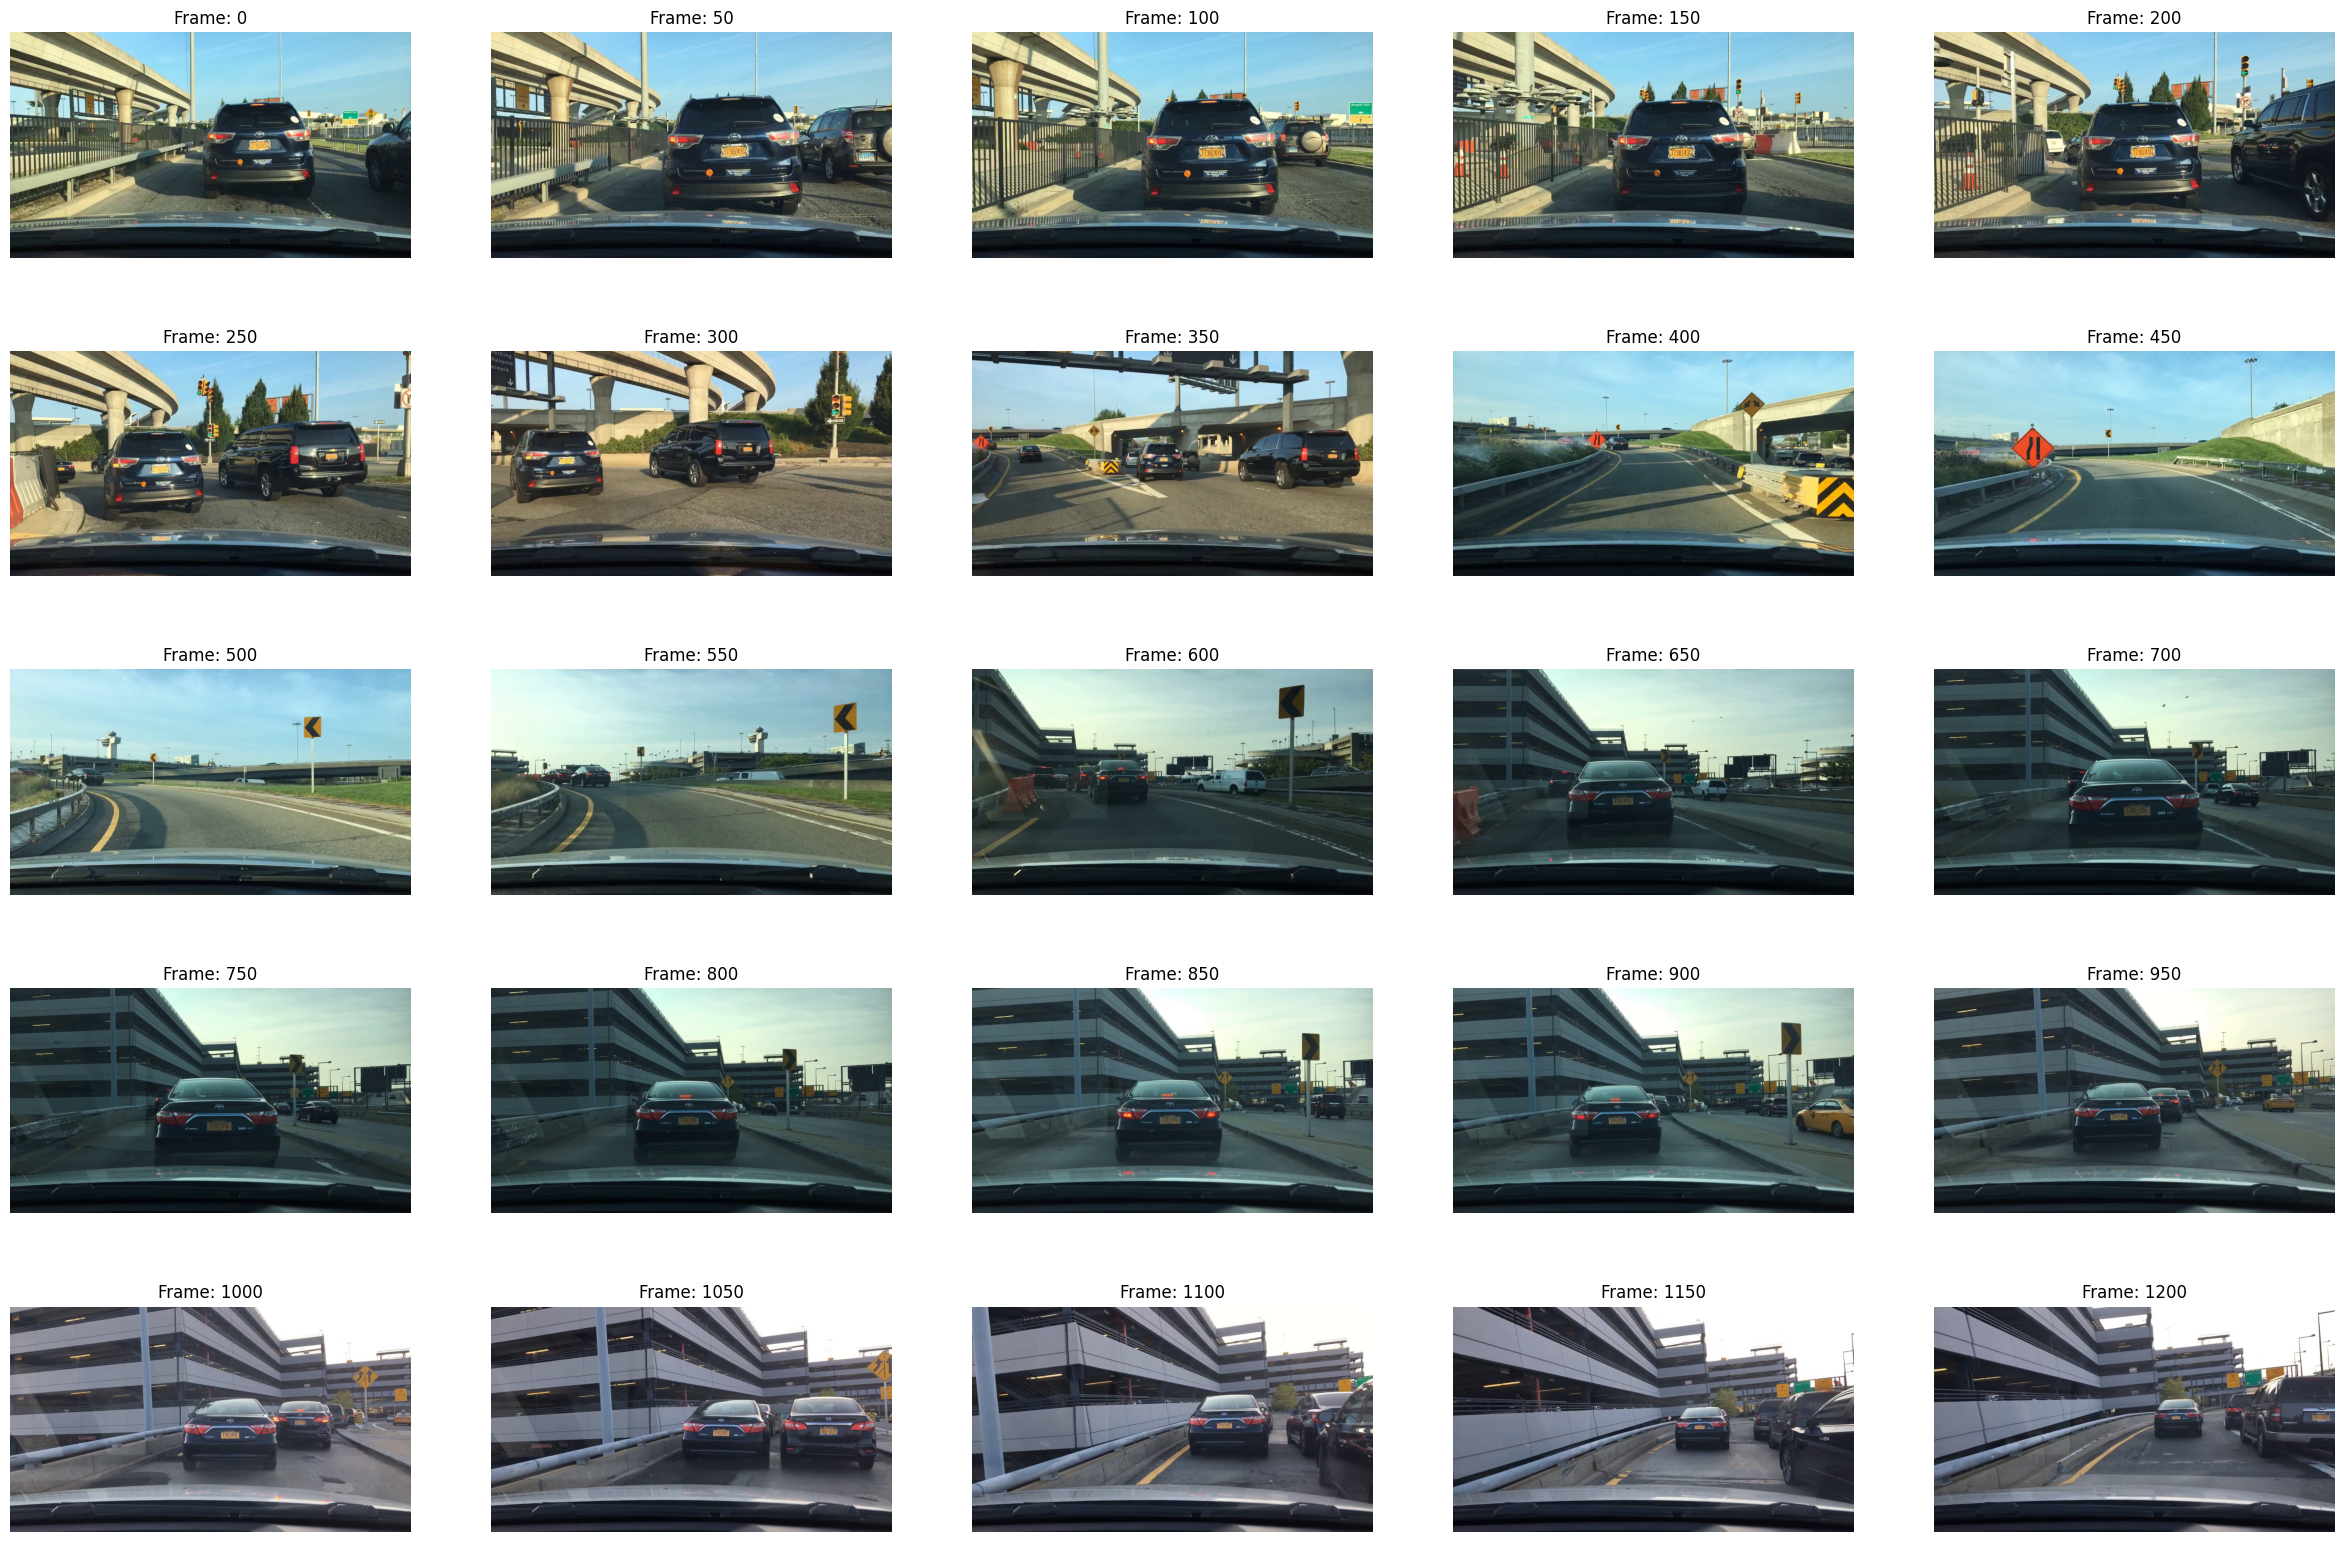

In [45]:
#Display multiple images from video

fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

cap = cv2.VideoCapture("0000f77c-6257be58.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 50 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.show()
cap.release()
        

In [46]:
labels = pd.read_csv('/kaggle/input/driving-video-with-object-tracking/mot_labels.csv')
labels.head()

/tmp/ipykernel_32/1249220288.py:1: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  labels = pd.read_csv('/kaggle/input/driving-video-with-object-tracking/mot_labels.csv')


name          videoName  frameIndex       id  \
0  01c71072-718028b8-0000001.jpg  01c71072-718028b8           0  89537.0   
1  01c71072-718028b8-0000001.jpg  01c71072-718028b8           0  89538.0   
2  01c71072-718028b8-0000001.jpg  01c71072-718028b8           0  89539.0   
3  01c71072-718028b8-0000001.jpg  01c71072-718028b8           0  89540.0   
4  01c71072-718028b8-0000001.jpg  01c71072-718028b8           0  89541.0   

     category attributes.crowd attributes.occluded attributes.truncated  \
0         car            False                True                False   
1         car            False                True                False   
2  pedestrian            False                True                False   
3         car            False               False                False   
4         car            False               False                False   

     box2d.x1     box2d.x2    box2d.y1    box2d.y2  haveVideo  
0  825.173210  1003.094688  355.011547  418.198614       True  
1  484.295612   700.461894  346.697460  424.849885       True  
2  645.588915   663.879908  338.383372  358.337182       True  
3  120.969977   192.471132  359.168591  409.053118       True  
4  251.501155   315.519630  354.180139  400.739030       True

In [47]:
labels.tail()

name          videoName  frameIndex  \
2890841  00adbb3f-7757d4ea-0000202.jpg  00adbb3f-7757d4ea         201   
2890842  00adbb3f-7757d4ea-0000202.jpg  00adbb3f-7757d4ea         201   
2890843  00adbb3f-7757d4ea-0000202.jpg  00adbb3f-7757d4ea         201   
2890844  00adbb3f-7757d4ea-0000202.jpg  00adbb3f-7757d4ea         201   
2890845  00adbb3f-7757d4ea-0000202.jpg  00adbb3f-7757d4ea         201   

              id category attributes.crowd attributes.occluded  \
2890841  70587.0      car            False                True   
2890842  70591.0      car            False                True   
2890843  70593.0      car            False                True   
2890844  70581.0      car            False                True   
2890845  70582.0      bus            False                True   

        attributes.truncated    box2d.x1    box2d.x2    box2d.y1    box2d.y2  \
2890841                False  105.312994  169.282443  451.341401  500.152672   
2890842                False  312.328249  368.244275  460.368229  490.457656   
2890843                False  368.533042  414.700981  467.384253  491.059444   
2890844                False    0.524781  111.778426  446.064140  500.641399   
2890845                False  232.663849  288.368237  439.815242  453.748555   

         haveVideo  
2890841       True  
2890842       True  
2890843       True  
2890844       True  
2890845       True

In [ ]:
video_labels = (labels.query('videoName == "026c7465-309f6d33"').reset_index(drop=True).copy())
print(video_labels)

In [65]:
video_labels['category'].value_counts()

Series([], Name: count, dtype: int64)

In [59]:
# Pull frame 1035

cap = cv2.VideoCapture("026c7465-309f6d33.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame == 1036:
        break
cap.release()

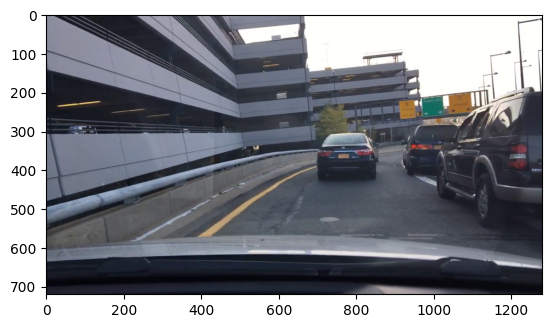

In [60]:
display_cv2_img(img)


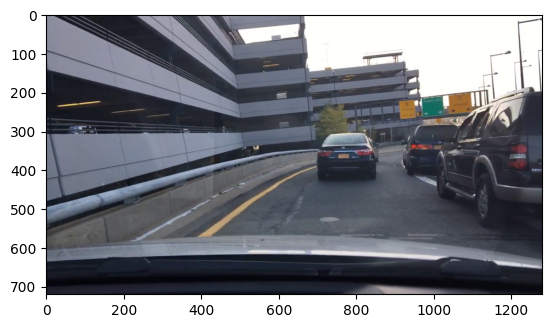

In [62]:
img_example = img.copy()
frame_labels = video_labels.query('videoName == "/kaggle/input/driving-video-with-object-tracking/bdd100k_videos_train_00/bdd100k/videos/train/026c7465-309f6d33.mov"')
for i, d in frame_labels.iterrows():
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    cv2.rectangle(img_example, pt1, pt2, (0, 0, 255), 3)

display_cv2_img(img_example)